# UnSupervised Learning - Project 2 Qualitative Bankruptcy

Data Description:
Data contains details of some decision rules which can help in predicting
qualitative bankruptcy

Attribute Information:
(P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
1. Industrial Risk: {P,A,N}
2. Management Risk: {P,A,N}
3. Financial Flexibility: {P,A,N}
4. Credibility: {P,A,N}
5. Competitiveness: {P,A,N}
6. Operating Risk: {P,A,N}
7. Class: {B,NB}

Internal Risks: 	
i.Industry risk (IR) : 
	Government policies and International agreements, 
	Cyclicality, 
	Degree of competition,				
	The price and stability of market supply,
	The size and growth of market demand,	
	The sensitivity to changes in macroeconomic factors,
	Domestic and international competitive power, 
	Product Life Cycle.
    
ii.Management risk(MR): 
	Ability and competence of management, 
	Stability of management,
	The relationship between management/ owner, 
	Human resources management, 
	Growth process/business performance, 
	Short and long term business planning, 
	achievement and feasibility. 
    
iii.Financial Flexibility(FF): 
	Direct financing, 
	Indirect financing, 
	Other financing 
    
iv.Credibility (CR):  
	Credit history,  
	reliability of information, 
	The relationship with financial institutes.
    
v.Competitiveness (CO):  
	Market position, 
	The level of core capacities, 
	Differentiated strategy, 
    
vi.Operating Risk (OP):  
	The stability and diversity of procurement, 
	The stability of transaction, 
	The efficiency of production, 
	The prospects for demand for product and service, 
	Sales diversification,
	Sales price and settlement condition, 
	Collection of A/R,
	Effectiveness of sale network.
 
Missing Attribute Values: None
 
Class Distribution: [143 instances For Non-Bankruptcy] [107 instances For Bankruptcy]
        Information about the dataset
  	CLASSTYPE: nominal


In [1]:
# Numerical libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


In [2]:
# Read data file
bank_df = pd.read_csv("Qualitative_Bankruptcy.data.txt",encoding='utf-8',header=None)
bank_df.head()

,0,1,2,3,4,5,6
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
bank_df.columns = ['IR','MR','FF','CR','CO','OR','Class']

In [4]:
bank_df.head()

,IR,MR,FF,CR,CO,OR,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
bank_df.isnull().sum()

IR       0
MR       0
FF       0
CR       0
CO       0
OR       0
Class    0
dtype: int64

In [6]:
bank_df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [7]:
# understanding datatypes and data for 6 features 
bank_df.shape

(250, 7)

In [8]:
bank_df.dtypes

IR       object
MR       object
FF       object
CR       object
CO       object
OR       object
Class    object
dtype: object

In [9]:
bank_df.describe().transpose()

,count,unique,top,freq
IR,250,3,N,89
MR,250,3,N,119
FF,250,3,N,119
CR,250,3,N,94
CO,250,3,N,103
OR,250,3,N,114
Class,250,2,NB,143


In [10]:
## Manual Encoding for 6 categorical features
## Since each feature has the 3 standard classes which has ordering do manual encoding
Encoding_dict = { 'N' : 1,
                  'A' : 2,
                  'P' : 3 }
bank_df['IR']=bank_df.IR.map(Encoding_dict)
bank_df['MR']=bank_df.MR.map(Encoding_dict)
bank_df['FF']=bank_df.FF.map(Encoding_dict)
bank_df['CR']=bank_df.CR.map(Encoding_dict)
bank_df['CO']=bank_df.CO.map(Encoding_dict)
bank_df['OR']=bank_df.OR.map(Encoding_dict)
bank_df
bank_df1=bank_df.copy()

In [11]:
bank_df

,IR,MR,FF,CR,CO,OR,Class
0,3,3,2,2,2,3,NB
1,1,1,2,2,2,1,NB
2,2,2,2,2,2,2,NB
3,3,3,3,3,3,3,NB
4,1,1,3,3,3,1,NB
...,...,...,...,...,...,...,...
245,1,1,2,1,1,1,B
246,3,1,1,1,1,1,B
247,2,1,1,1,1,1,B
248,1,1,1,1,1,1,B


In [12]:
class_dict={'NB':0,'B':1}
bank_df['Class']=bank_df.Class.map(class_dict)
bank_df

,IR,MR,FF,CR,CO,OR,Class
0,3,3,2,2,2,3,0
1,1,1,2,2,2,1,0
2,2,2,2,2,2,2,0
3,3,3,3,3,3,3,0
4,1,1,3,3,3,1,0
...,...,...,...,...,...,...,...
245,1,1,2,1,1,1,1
246,3,1,1,1,1,1,1
247,2,1,1,1,1,1,1
248,1,1,1,1,1,1,1


In [13]:
## Seperate Independent and Target Variables
X=bank_df.drop(['Class'],axis=1)
Y=bank_df['Class']

C:\Users\SivaPC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SivaPC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


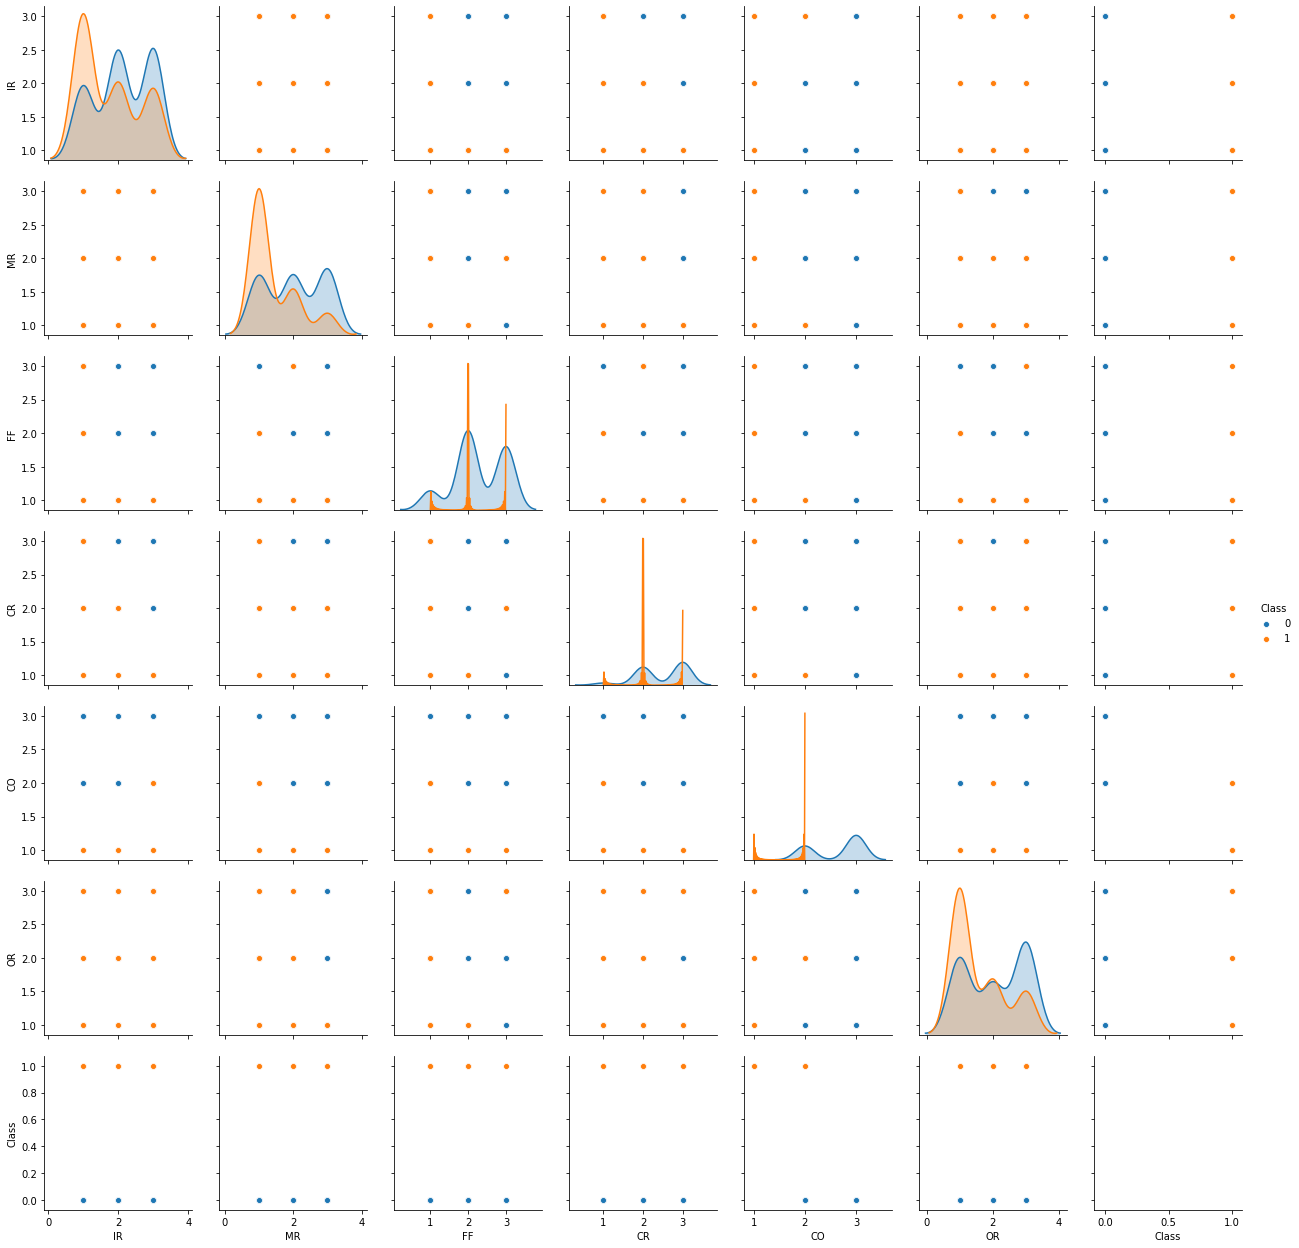

In [14]:
## Distribution
sns.pairplot(bank_df,diag_kind='kde',hue='Class')

#### Since the independent features is categorical distribution plot shows the discrete counts across 3 classes of values.
#### All independent features are multi modal with values across 3 types of classes of N,A and P.
#### Target Bankruptcy and non bankruptcy classes data are present in all the 3 classes of independent features
#### Financial Flexibility, Credibility and Competitiveness has small maximum values for Bankruptydata and Competitiveness has no postive category values for Bankruptcy type of records

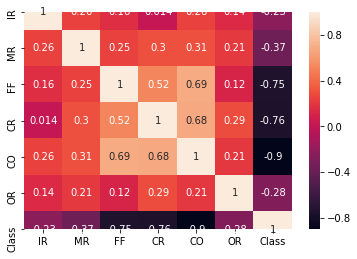

In [15]:
sns.heatmap(bank_df.corr(),annot=True)

### Correlation Findings

#### There is significant correlation between Competitiveness and features Financial flexibility and Credibility
#### Also credibility has some correlation with Financial Flexibility
#### Target variable Class has negative correlation with all independent features which denotes that Class is not impacted by independent features but by combination of all independent features

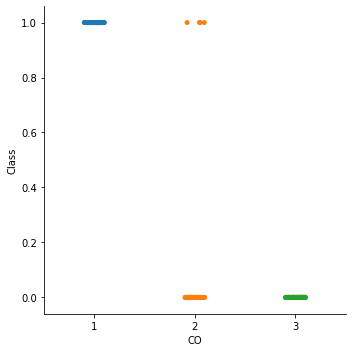

In [16]:
sns.catplot(x='CO',y='Class',data=bank_df)

### KMeans 

In [21]:
## Splitting dataset into train and test

from sklearn.model_selection import train_test_split
X=bank_df.drop(['Class'],axis=1)
Y=bank_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [22]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1,15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X_train)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,727.440000
1,2,461.929355
2,3,381.307663
3,4,342.570551
4,5,302.986776
5,6,273.216718
6,7,251.460994
7,8,221.127889
8,9,205.184020
9,10,191.793383


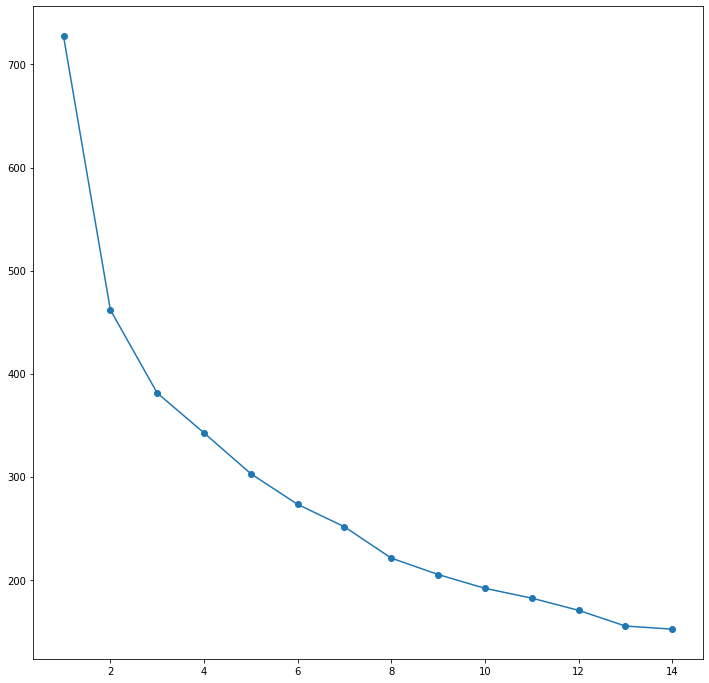

In [23]:
# Elbow plot

plt.figure(figsize=(12,12))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Optimal cluster size based on elbow fit is 3

In [24]:
### Cluster of data for optimal clustersize of 3 which matches with the 3 type of classes present for each feature.

# Number of clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(X_train)

# Getting the cluster labels

y_labels_train=kmeans.labels_
y_labels_test=kmeans.predict(X_test)

# Centroid values

centroids = kmeans.cluster_centers_


# Comparing with scikit-learn centroids

print("Centroid values")

print(centroids) # From sci-kit learn

Centroid values
[[1.69444444 1.43055556 1.04166667 1.20833333 1.04166667 1.66666667]
 [1.81034483 1.72413793 2.39655172 2.48275862 2.65517241 1.46551724]
 [2.46666667 2.42222222 2.15555556 2.48888889 2.44444444 2.95555556]]


In [25]:
## creating a new feature on training and test data set for labels
X_train['clust_label']=y_labels_train
X_test['clust_label']=y_labels_test

C:\Users\SivaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SivaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
X_train

,IR,MR,FF,CR,CO,OR,clust_label
59,1,1,3,3,3,2,1
88,1,1,3,3,3,2,1
240,1,1,1,2,1,2,0
199,1,1,1,3,1,1,0
207,1,1,1,1,1,2,0
...,...,...,...,...,...,...,...
137,1,3,3,3,3,1,1
72,3,2,3,2,3,3,2
140,3,1,3,2,2,3,2
235,2,1,1,1,1,2,0


In [27]:
bank_df['Class'].value_counts()

0    143
1    107
Name: Class, dtype: int64

In [28]:
## Hierarchical clustering on the dataset
from sklearn.cluster import AgglomerativeClustering 
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model2.fit(bank_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [29]:
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

0    106
1     83
2     61
Name: 0, dtype: int64

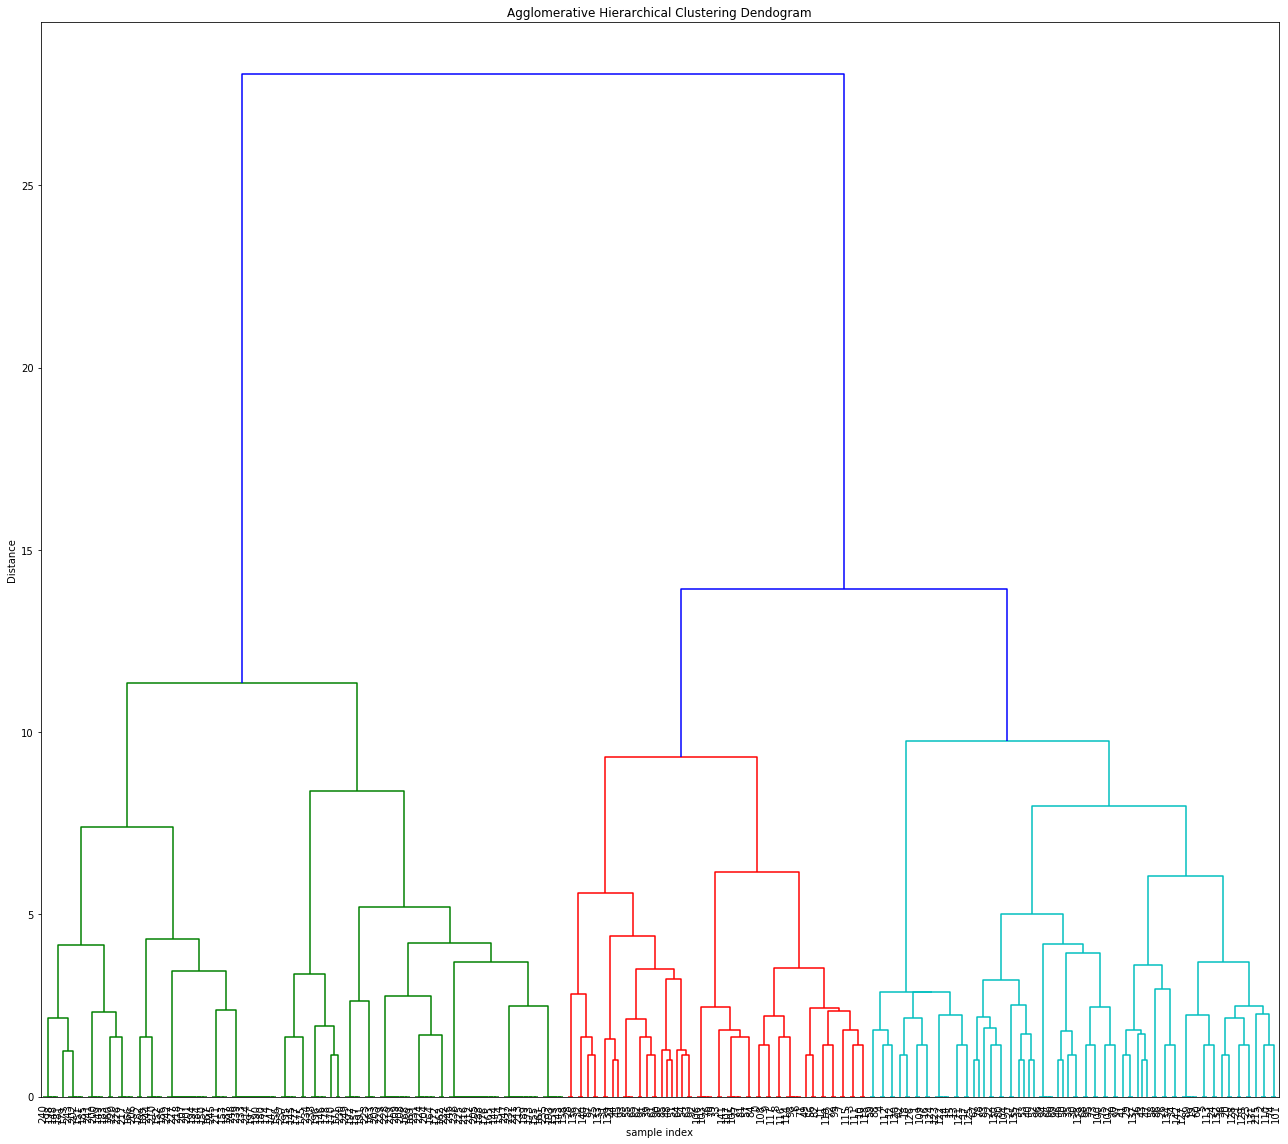

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level',)
plt.tight_layout()

#### There is clear cluster 1 on left side and for the other group there are 2 subgroup as cluster group 2 and 3 on right side

In [38]:
X_test.shape

(75, 7)

In [40]:
X_test.columns

Index(['IR', 'MR', 'FF', 'CR', 'CO', 'OR', 'clust_label'], dtype='object')

In [31]:
## Cluster labels added as features in Training and Test data set and then used in prediction for the model which improved the score

from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train,y_train)

C:\Users\SivaPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred=clf.predict(X_test)

In [33]:
clf.predict_proba(X_test)

array([[0.93981523, 0.06018477],
       [0.02048047, 0.97951953],
       [0.01112796, 0.98887204],
       [0.00395479, 0.99604521],
       [0.99322169, 0.00677831],
       [0.00796103, 0.99203897],
       [0.97167956, 0.02832044],
       [0.00665776, 0.99334224],
       [0.00578376, 0.99421624],
       [0.99474731, 0.00525269],
       [0.0044467 , 0.9955533 ],
       [0.00895266, 0.99104734],
       [0.98059208, 0.01940792],
       [0.04198948, 0.95801052],
       [0.99660751, 0.00339249],
       [0.98934396, 0.01065604],
       [0.0044467 , 0.9955533 ],
       [0.99385088, 0.00614912],
       [0.96983413, 0.03016587],
       [0.97226931, 0.02773069],
       [0.00895266, 0.99104734],
       [0.99213641, 0.00786359],
       [0.97907049, 0.02092951],
       [0.01206081, 0.98793919],
       [0.99511264, 0.00488736],
       [0.97859687, 0.02140313],
       [0.00895266, 0.99104734],
       [0.00578376, 0.99421624],
       [0.98908668, 0.01091332],
       [0.00895266, 0.99104734],
       [0.

In [34]:
from sklearn.metrics import confusion_matrix
print("What is the Testing Accuracy")
print(clf.score(X_test,y_test))
print("What is the Training Accuracy")
print(clf.score(X_train,y_train))
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

What is the Testing Accuracy
0.9866666666666667
What is the Training Accuracy
0.9942857142857143
[[40  1]
 [ 0 34]]


In [35]:
# get support vectors
clf.support_vectors_

array([[1., 1., 3., 3., 3., 3., 1.],
       [2., 2., 2., 2., 2., 2., 1.],
       [3., 1., 2., 1., 2., 3., 2.],
       [3., 3., 3., 3., 2., 3., 2.],
       [3., 1., 2., 2., 2., 1., 1.],
       [3., 1., 1., 3., 3., 2., 1.],
       [1., 1., 2., 2., 2., 1., 1.],
       [1., 3., 2., 2., 2., 1., 1.],
       [1., 1., 2., 2., 2., 1., 1.],
       [3., 3., 3., 2., 2., 3., 2.],
       [1., 3., 2., 3., 2., 3., 2.],
       [3., 2., 3., 1., 3., 1., 1.],
       [1., 3., 2., 2., 2., 1., 1.],
       [2., 3., 1., 3., 2., 3., 2.],
       [1., 1., 1., 3., 1., 1., 0.],
       [1., 1., 1., 2., 1., 3., 0.],
       [1., 1., 2., 1., 1., 1., 0.],
       [1., 3., 1., 1., 1., 1., 0.],
       [1., 1., 2., 1., 1., 1., 0.],
       [1., 2., 3., 2., 1., 3., 2.],
       [3., 1., 1., 1., 2., 2., 0.],
       [2., 3., 1., 2., 1., 1., 0.],
       [2., 3., 1., 2., 1., 1., 0.],
       [3., 1., 1., 1., 2., 2., 0.]])

In [36]:
# get indices of support vectors
clf.support_

array([ 60,  72,  85,  88, 106, 109, 113, 116, 137, 142, 144, 146, 161,
       167,   3,  80, 104, 126, 143, 148, 152, 156, 159, 166])

In [37]:
# get number of support vectors for each class
clf.n_support_

array([14, 10])

In [ ]:
`